In [ ]:
import sys
from pathlib import Path
import sqlite3
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from train import *

/var/folders/nt/fl_7gtz11djgfm44q42rbw200000gn/T/ipykernel_60632/3490898220.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["anomaly_label"] = model.predict(X_test)


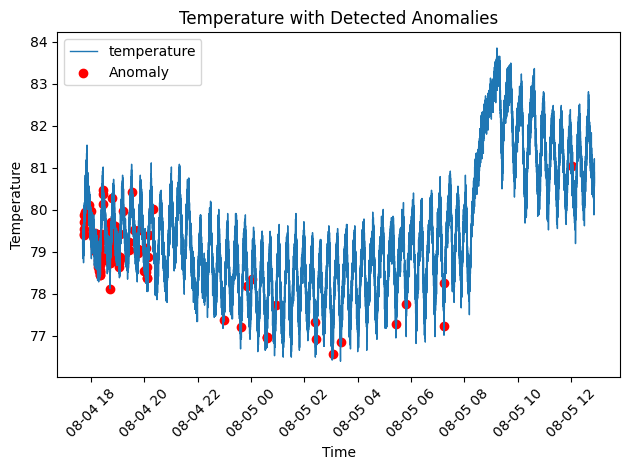

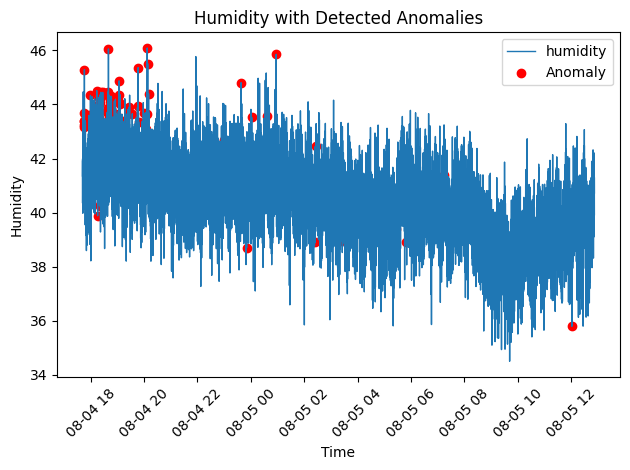

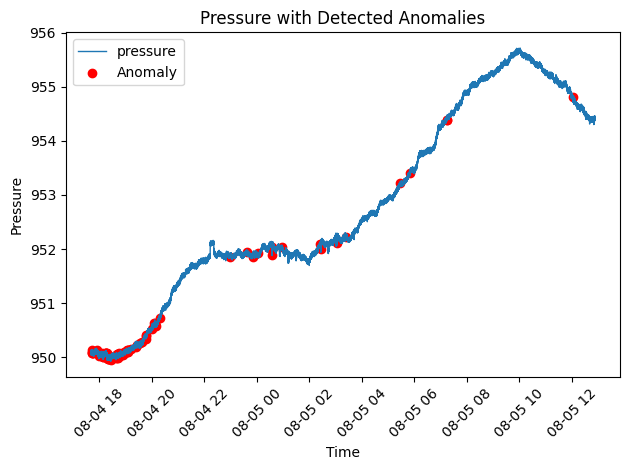

In [28]:
db_path = "../weather-dashboard/data/weather.db"
conn = sqlite3.connect(db_path)
df = pd.read_sql_query(
    "SELECT timestamp, temperature, humidity, pressure FROM weather_data",
    conn,
    parse_dates=["timestamp"]
)
conn.close()

df = prepare_data(df)


_, df_test = split_data(df, train_size=0.8)


model_path = "models/isolation_forest.joblib"
model = joblib.load(model_path)

X_test = df_test.drop(columns=["timestamp"])
df_test["anomaly_label"] = model.predict(X_test)

for feature in ["temperature", "humidity", "pressure"]:
    fig, ax = plt.subplots()
    ax.plot(df_test["timestamp"], df_test[feature], label=feature, linewidth=1)
    # red dots where anomaly_label == -1
    anoms = df_test[df_test["anomaly_label"] == -1]
    ax.scatter(anoms["timestamp"], anoms[feature], color="red", label="Anomaly")
    ax.set_title(f"{feature.capitalize()} with Detected Anomalies")
    ax.set_xlabel("Time")
    ax.set_ylabel(feature.capitalize())
    ax.legend()
    plt.xticks(rotation=45)
    plt.ylim
    plt.tight_layout()
    plt.show()
